# Lesson 16 -  Solutions
These exercises are to help you check your understanding during class. They will not be collected.

## Part 1: Linear Function

### Exercise 0 - Set up
- Save your own copy of this notebook by using the menu opetion File > Save As.
- Now, **refresh the page**. The red icon in the upper right should no longer be visible. 
- Run the code in the first cell below to load the packages that that we will use today.
- Run the code in the second cell below to create the `points` data frame. 

In [2]:
# load the dypyr and ggplot2 packages
library('dplyr')
library('ggplot2')

# Resizes all plots to 5 in by 4 in
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”


In [3]:
# Create and store a data frame with one column containing the numbers 1 - 10
points <- data.frame('x_values' = 1:10)

### Exercise 1 -  First line
- Create a function called `my_line()` corresponds to the line with slope 1/2 through the point (4,3).
- Test the function `my_line()` by plugging in 4 and verifying that 3 is the output.
- Test the function for the input values 5 and 6. Is the output what you expected?

In [4]:
# Strategy 1: Slope intercept form

# myline(x)  = y = m x + b
my_line <- function(x){
    (1/2)*x + 1  # y = m x + b where m = 1/2 slope and b is the y-intercept;
                # find by by plugging in x = 4 and y=3 from known point
}

In [6]:
# Strategy 2: Slope intercept form

my_line <- function(x){
    (1/2)*(x-4) + 3
}

In [5]:
# Test function
my_line(4) # Expect 3
my_line(5) # Expect 3 + 1/2 = 3.5 
my_line(6) # Expect 3 + 2*(1/2) = 4

[1] 3

[1] 3.5

[1] 4

### Exercise 2 - Make a table and plot
- Use the `my_line()` function to add a column called `y_values` to the `points` data frame. The values in this column should satisfy the linear equation $y=(1/2)\cdot(x-4) + 3$ with for $x$ in the `x_values` column. 
- Plot the ten points that you just created.

In [5]:
# Strategy 1: use my_line
points <- mutate(points, y_values = my_line(x_values))

In [13]:
# Strategy 2: without my_line
points <- mutate(points, y_values = (1/2) * (x_values - 4) + 3)

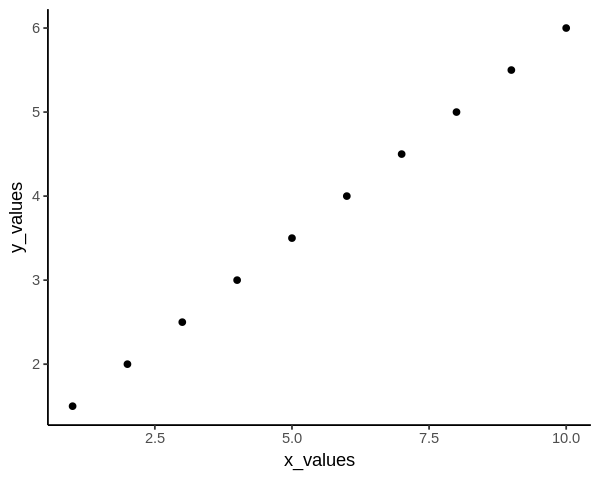

In [14]:
ggplot(points, aes(x = x_values, y = y_values)) +
    geom_point() + 
    theme_classic()

## Part 2: Manual Linear Model

### Exercise 3 - Birth weight manual linear model
- Execute the code in the cell be low to 
    + load the baby weight data
    + extract the data for babys whose mothers smoked
    + create a scatter plot of getational time and birth weight
- Create a function called `birth_weight()` that uses a linear model to predict the birth weight of a baby born to a mother who smokes based on the length of the gestation. 

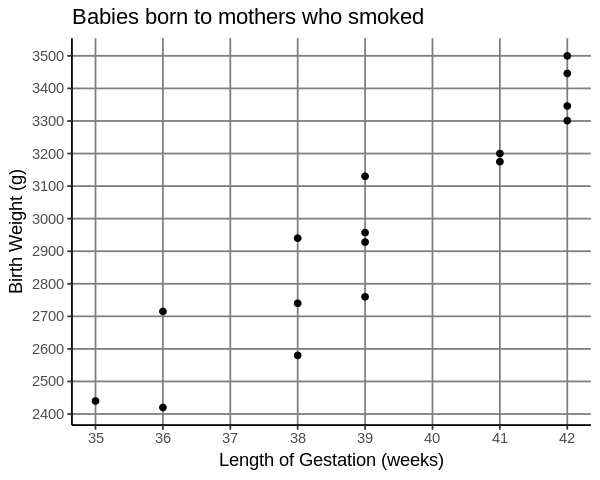

In [34]:
# load the baby weight data
babyweight <-read.csv('~/shared/data/babyweight.csv')
#extract the data for babys whose mothers smoked
babyweight_smoking <- filter(babyweight, Smoke=='yes')

# create a scatter plot of getational time and birth weight
ggplot(babyweight_smoking, aes(x=Gest, y=Wgt)) + 
    geom_point() + 
    scale_x_continuous(breaks = 32:42) +
    scale_y_continuous(breaks = seq(2400, 3600, 100)) +
    xlab('Length of Gestation (weeks)') +
    ylab('Birth Weight (g)') +
    labs(title = 'Babies born to mothers who smoked') +
    theme_classic() +
    theme(panel.grid.major = element_line(color = "grey50"))

The line through the points (36, 2500) and (41, 3300) looks like a good fit. It has slope
$$\frac{3300 -2400}{41-36}.$$

In [36]:
slope <- (3300 -2400)/(41-36)

# g is gestation
birth_weight <- function(g){
    slope * (g-36) + 2400 # point slope form
}

### Exercise 4 - Predict birth weight
- Use your `birth_wight()` function to add a column called `Pred` to the `babyweight_smoking` data frame. The column should contain your prediction of the birth weight based on the gestational period. 
- Plot the line of your predictions using `geom_smooth()` and the actual data on the same plot.

Hint: Recall that you can specify the aesthetic mapping inside the geometry function of ggplot:

`geom_smooth(mapping = aes( ... ))`

In [73]:
# Create column
babyweight_smoking <- mutate(babyweight_smoking, Pred = birth_weight(Gest))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


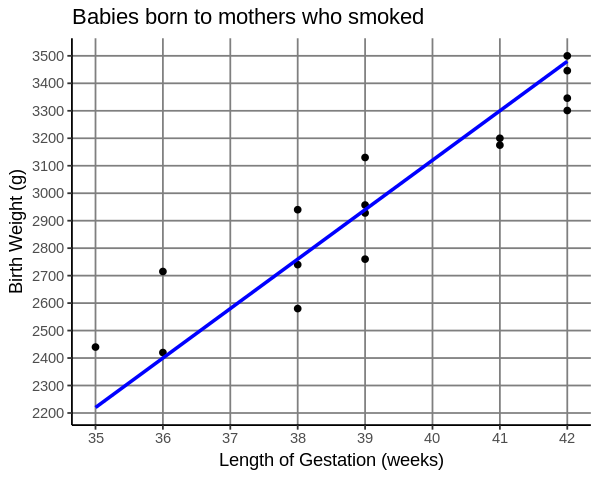

In [74]:
# Plot
ggplot(babyweight_smoking) + ### Changed: no aes()
    geom_point(mapping = aes(x=Gest, y=Wgt)) + ### added aes()
    geom_smooth(mapping = aes(x=Gest, y=Pred),  ### NEW
               color = 'blue', 
    ) +
    scale_color_manual(values = colors) +
    scale_x_continuous(breaks = 32:42) +
    scale_y_continuous(breaks = seq(2200, 3600, 100)) +
    labs(title = 'Babies born to mothers who smoked',
        x = 'Length of Gestation (weeks)',
        y ='Birth Weight (g)' 
    ) +
    theme_classic() +
    theme(panel.grid.major = element_line(color = "grey50"))

### Exercise 5 - Birth weight Mean Squared Error

- Add a column called `Residual` to the `babyweight_smoking` data frame. Using the definition of residual given below. 
$$\text{Residual} = \text{Observed value} – \text{Predicted value} $$

- Compute the mean squared error (mse) for your predictions using the definition given below.
$$ \text{mean squared error} = \frac{\text{ sum of the squares of the residuals}}{\text{number of observations}}$$

In [89]:
# Create column
babyweight_smoking <- mutate(babyweight_smoking, Residual = Wgt - Pred)

# Mean squared error
mean(babyweight_smoking$Residual^2)

[1] 22458.5

## Part 3 - Birth weight automatic linear model

### Exercise 6 - Plot the automatic model
- Use `geom_smooth()` to plot the linear model generated by the `lm` method for the `babyweight_smoking` data set. 
`geom_smooth(method = lm, formula = 'y~x', se = FALSE)`

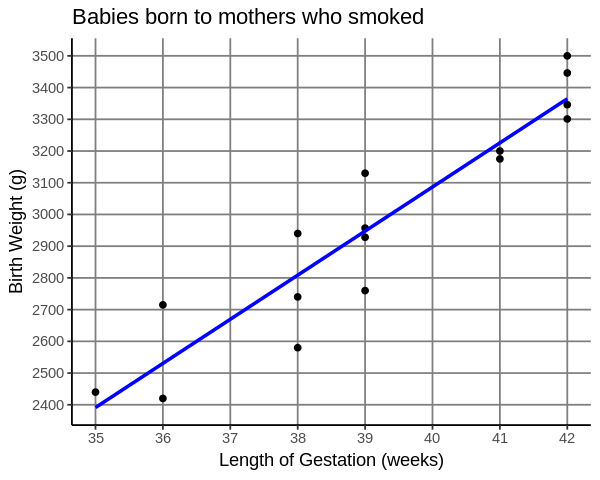

In [87]:
# Plot
ggplot(babyweight_smoking, aes(x=Gest, y=Wgt)) + 
    geom_point() + 
    geom_smooth(method = lm, 
                formula = 'y~x', # x and y variables of the plot
                se = FALSE, # hide error shading
               color = 'blue', 
    ) +
    scale_color_manual(values = colors) +
    scale_x_continuous(breaks = 32:42) +
    scale_y_continuous(breaks = seq(2200, 3600, 100)) +
    labs(title = 'Babies born to mothers who smoked',
        x = 'Length of Gestation (weeks)',
        y ='Birth Weight (g)' 
    ) +
    theme_classic() +
    theme(panel.grid.major = element_line(color = "grey50"))

### Exercise 7 - Prediction automatic linear model
- Use the `lm` function to automatically generate a linear model and store the result in a variable called `model`. 
`lm(formula = YVARIABLE ~ XVARIABLE, data = DATAFRAME)`
- Extract the slope and y-intercept from the model.
- Use the model to predict the birth weight of a baby with a mother that smoked and a gestation time of 40 weeks. Does the value agree with the value in the plot in Exercise 8?

In [94]:
model <- lm(formula = Wgt ~ Gest, data = babyweight_smoking)
slope <- model$coefficients[[2]]
intercept <- model$coefficients[[1]]

slope * 40 + intercept

[1] 3086.586

### Exercise 8 - Mean squared error automatic linear model
- Compute the mean squared error of the automatic model. How does it compare to that of your manual model?

In [92]:
# mean squared error
mean(model$residual^2)

[1] 14019.37

The mean squared error for our manual model was 22458.5 and that for the automatic linear model was 14019.4. We conclude that the automatic linear model is a better model with respect to this measure. 

### Exercise 9 - Avoiding Over Fit
- What is wrong with the approach we used in this notebook?

The training data was not separate from the testing data and both models were tested on the same data.

## Examples

In [29]:
# random data
set.seed(4491) # ensures that the output is constistant
random_points <- data.frame('x_values' = 1:10, 
                            'y_values' = (1:10)*0.5 + 1 + runif(10, -0.5, 0.5)
                            )

In [60]:
line <- lm(formula = y_values ~ x_values, data = random_points)

In [61]:
line


Call:
lm(formula = y_values ~ x_values, data = random_points)

Coefficients:
(Intercept)     x_values  
     0.9813       0.5074  


These coefficients can be used to construct and equations as follows:
$$\text{y_values} = 0.9813  + 0.5074(\text{x_values})$$

In [62]:
slope <-line$coefficients[[2]]
intercept <- line$coefficients[[1]]
slope
intercept

[1] 0.5074112

[1] 0.981329

We can use these variables to construct a function as follows:

In [33]:
L <- function(x){
    intercept + slope*x
}
# This function does not need to be vectorized, 
# because all of the internal operations are vectorized by default. 

We can check that our function agrees with the fitted values

In [67]:
data.frame('function L' = L(random_data$x_values), 'lm fitted values' = line$fitted.values)

,function.L,lm.fitted.values
,<dbl>,<dbl>
1,1.488740,1.488740
2,1.996151,1.996151
3,2.503563,2.503563
4,3.010974,3.010974
5,3.518385,3.518385
6,4.025796,4.025796
7,4.533207,4.533207
8,5.040618,5.040618
9,5.548030,5.548030


We can then compute the difference between the actual y-values and the values predicted by the linear model $L(x)$.

In [34]:
random_data$y_values - L(random_data$x_values)

[1] -0.34342586  0.14174243  0.08564837  0.18036653 -0.23907311  0.09305309
 [7] -0.33634940 -0.51821586  0.26531961  0.07529622

WARNING! These differences do NOT agree with the residuals given by `lm()`

In [35]:
line$residuals

1           2           3           4           5           6 
-0.06836127  0.07003291 -0.26738555  0.11132116  0.45258276  0.23308474 
          7           8           9          10 
-0.46246640 -0.36612374  0.18315399  0.11416141

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



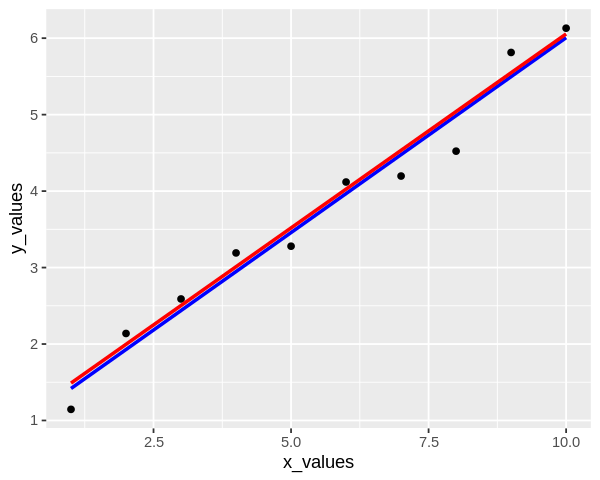

In [76]:
ggplot(random_data, aes(x=x_values, y=y_values)) +
    geom_point() + 
    geom_smooth(method = lm, 
                formula = 'y~x', # x and y variables of the plot
                se = FALSE, # hide error shading
                color = 'blue'
                ) + 
    geom_smooth(mapping = aes(x=x_values, y=line$fitted.values), color = 'red')

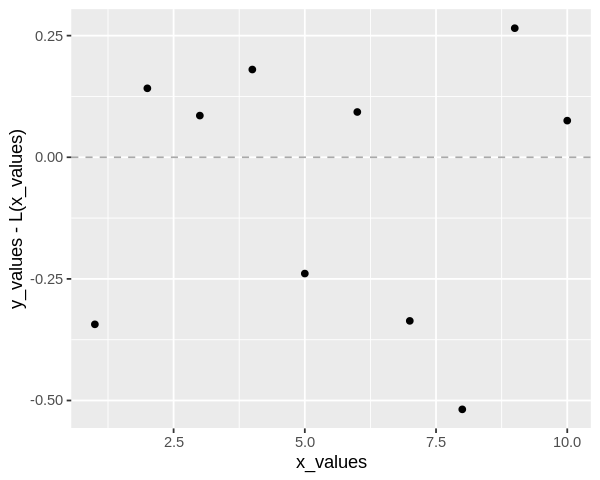

In [77]:
ggplot(random_data, aes(x=x_values, y = y_values-L(x_values))) +
    geom_point()+
    geom_hline(yintercept=0, linetype="dashed", color = "darkgrey")